In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

##Generate data

In [6]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

##convert input types into tensors
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

##Solving with Tensorflow

In [7]:
training_data = np.load('TF_intro.npz')

In [19]:
input_size =2
output_size = 1

#define model in tensor flow
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(output_size)
#])
#model.compile(optimizer= 'sgd', loss='mean_squared_error')
#model.fit(training_data['inputs'],training_data['targets'], epochs=100, verbose=2)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                          )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer= custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 29.6202 - 325ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1797 - 41ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4520 - 44ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4166 - 40ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3828 - 50ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.4003 - 45ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3757 - 40ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.4246 - 44ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3819 - 41ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3753 - 41ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3843 - 45ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.4051 - 42ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3861 - 46ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.4139 - 44ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3989 - 41ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3605 - 46ms/epoch - 1ms/ste

##Extract Weights and Biases

In [11]:
model.layers[0].get_weights()

[array([[ 1.9772403],
        [-2.9534965]], dtype=float32),
 array([4.984857], dtype=float32)]

In [13]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9772403],
       [-2.9534965]], dtype=float32)

In [14]:
biases = model.layers[0].get_weights()[1]
biases

array([4.984857], dtype=float32)

##Extract the outputs (make predictions)

In [15]:
model.predict_on_batch(training_data['inputs'])

array([[-8.82056999e+00],
       [ 2.06448421e+01],
       [ 1.66837692e+00],
       [ 1.55741997e+01],
       [-2.38970661e+00],
       [-6.95415926e+00],
       [-1.24749603e+01],
       [-4.06055403e+00],
       [ 3.87335539e+00],
       [-2.25279675e+01],
       [ 1.18088951e+01],
       [ 1.03278913e+01],
       [ 2.57974663e+01],
       [ 1.60883217e+01],
       [ 3.77005053e+00],
       [-5.80562162e+00],
       [-7.93269968e+00],
       [ 2.23154202e+01],
       [ 4.56883316e+01],
       [ 2.77163792e+00],
       [-8.29846191e+00],
       [ 6.50458860e+00],
       [-1.33590946e+01],
       [-1.54919739e+01],
       [ 6.61143970e+00],
       [-3.18031063e+01],
       [ 3.26351213e+00],
       [-1.01195564e+01],
       [-2.16027355e+01],
       [-2.52414684e+01],
       [-1.32138901e+01],
       [-1.84748707e+01],
       [-1.71966133e+01],
       [ 3.22395363e+01],
       [-2.40538359e+00],
       [ 1.98165112e+01],
       [ 2.00100822e+01],
       [-6.12335157e+00],
       [-3.4

In [16]:
training_data['targets'].round(1)

array([[ -9.2],
       [ 20.7],
       [  2.4],
       [ 15.2],
       [ -2.9],
       [ -8. ],
       [-11.7],
       [ -4.9],
       [  3.9],
       [-23.8],
       [ 12.2],
       [ 11.1],
       [ 25.5],
       [ 16.8],
       [  3.7],
       [ -6.5],
       [ -8.8],
       [ 23. ],
       [ 45.5],
       [  3.4],
       [ -7.9],
       [  6.2],
       [-12.6],
       [-14.8],
       [  6. ],
       [-32. ],
       [  3.2],
       [-11.2],
       [-22.4],
       [-25.7],
       [-13.5],
       [-18.7],
       [-16.7],
       [ 33.1],
       [ -3.1],
       [ 21. ],
       [ 19.9],
       [ -7.1],
       [-35.9],
       [ 21. ],
       [ 39. ],
       [ 16.8],
       [-14.7],
       [-29.1],
       [ 10.8],
       [  6. ],
       [-44.4],
       [ -4.7],
       [ -4.6],
       [-34.5],
       [ 14.1],
       [ 30. ],
       [ 19.3],
       [  5.6],
       [ -5.1],
       [ 11.6],
       [ 18.9],
       [ 25.4],
       [  5.9],
       [ 10.8],
       [-13.8],
       [-17.5],
       [

##Plotting Data

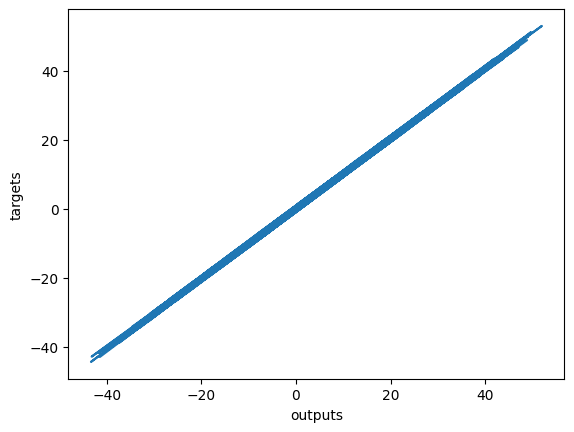

In [17]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()